In [234]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Importing Data

In [235]:
columns = ['Age','Workclass','fnlgwt','Education','Education_num','Marital_Status',
           'Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss',
           'Hours/Week','Native_country','Income']
train=pd.read_csv('adult-training.csv', names=columns)
test=pd.read_csv('adult-test.csv',names=columns, skiprows=1)

In [236]:
train.head()

,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education_num     32561 non-null int64
Marital_Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native_country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [238]:
train.describe(include=['O'])

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [239]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

We have a Workclass named '?', so we will replace it with Nan

In [240]:
test['Workclass'].value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: Workclass, dtype: int64

In [241]:
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)

In [242]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [243]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education_num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours/Week           0
Native_country     583
Income               0
dtype: int64

# Feature engineering

##  Income

In [244]:
train['Income']=train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income']=test['Income'].apply(lambda x: 1 if x==' >50K' else 0)

## Age

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

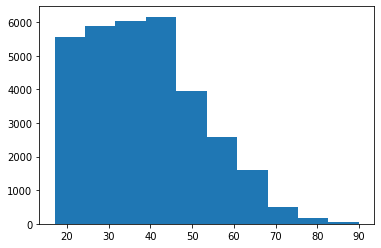

In [245]:
plt.hist(train['Age'])

The Age looks skewed, we will take care of this later

## Workclass

We will now fill the missing values

In [246]:
train['Workclass'].fillna('0', inplace=True)
test['Workclass'].fillna('0',inplace=True)

C:\Users\FODIL\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

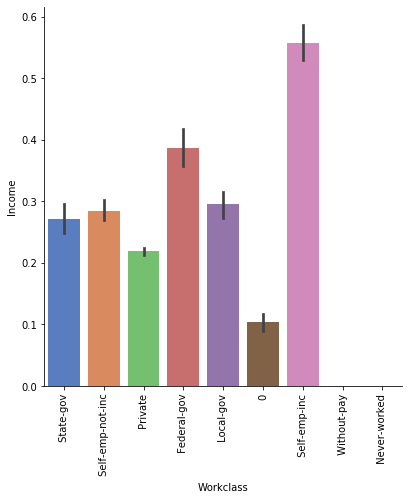

In [247]:
sns.factorplot(x='Workclass',y='Income',data=train,kind='bar',height=6,palette='muted')
plt.xticks(rotation=90)

In [248]:
train['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)
test['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

We can see that never-worked and without a pay are  pretty similar so we merge them

In [249]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
0                     1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: Workclass, dtype: int64

## Fnlgwt

In [250]:
train['fnlgwt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

Due to high values and high Std, we will apply the logarithmic function

In [251]:
train['fnlgwt']=train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt']=test['fnlgwt'].apply(lambda x: np.log1p(x))

train['fnlgwt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64

## Education

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

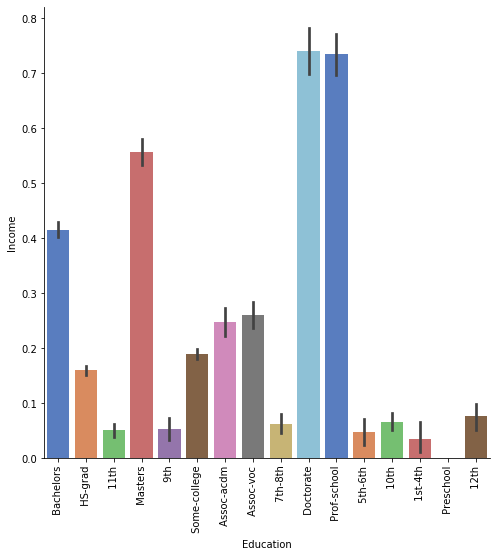

In [252]:
sns.factorplot(x='Education',y='Income',data=train,height=7,kind='bar',palette='muted')
plt.xticks(rotation=90)

We now will merge all the primary grades together and name it Primary

In [253]:
def prime(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']: 
        return 'Primary'
    else: 
        return x
        

In [254]:
train['Education']=train['Education'].apply(prime)
test['Education']=test['Education'].apply(prime)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

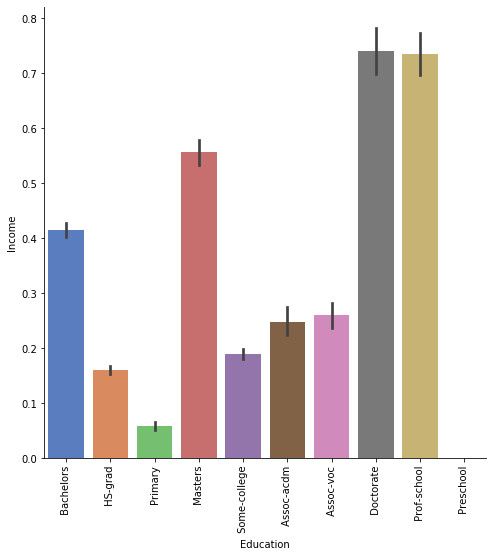

In [255]:
sns.factorplot(x='Education',y='Income',data=train,height=7,kind='bar',palette='muted')
plt.xticks(rotation=90)

## Education num

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

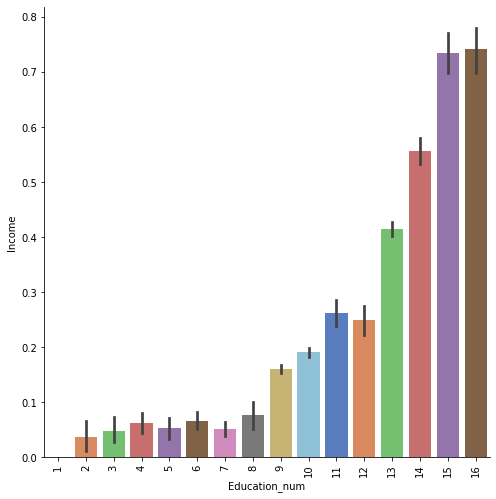

In [256]:
sns.factorplot(x='Education_num',y='Income',data=train,height=7,kind='bar',palette='muted')
plt.xticks(rotation=90)

## Marital status

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

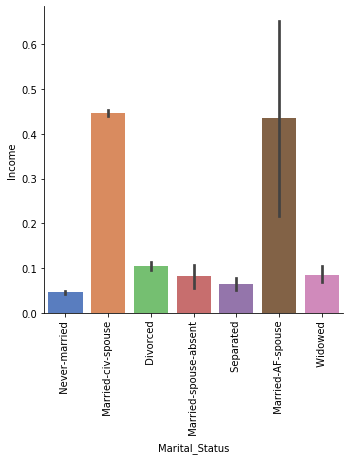

In [257]:
sns.factorplot(x='Marital_Status',y='Income',data=train,height=5,kind='bar',palette='muted')
plt.xticks(rotation=90)

In [258]:
train['Marital_Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['Marital_Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

In [259]:
train['Marital_Status'].value_counts()

 Married-civ-spouse       14999
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
Name: Marital_Status, dtype: int64

## Occupation

In [260]:
train['Occupation'].fillna('0',inplace=True)
test['Occupation'].fillna('0',inplace=True)

In [261]:
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

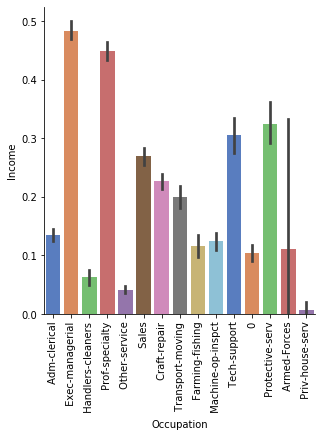

In [262]:
sns.factorplot(x='Occupation',y='Income',data=train,height=5,kind='bar',palette='muted')
plt.xticks(rotation=90)

In [263]:
train['Occupation'].replace(' Armed-Forces', '0', inplace=True)
test['Occupation'].replace(' Armed-Forces', '0', inplace=True)

In [264]:
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: Occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

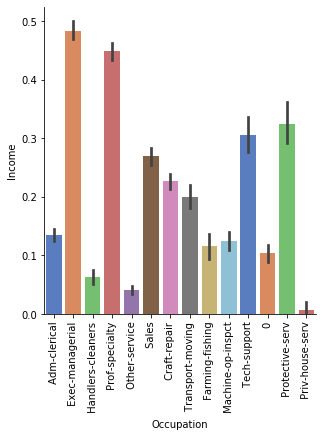

In [265]:
sns.factorplot(x='Occupation',y='Income',data=train,height=5,kind='bar',palette='muted')
plt.xticks(rotation=90)

## Relationship

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

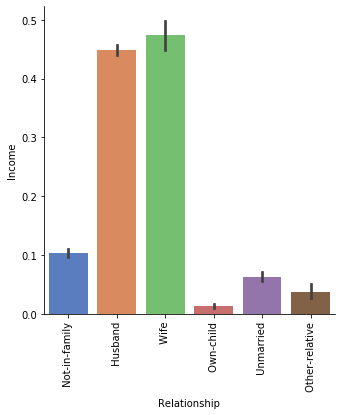

In [266]:
sns.factorplot(x='Relationship',y='Income',data=train,height=5,kind='bar',palette='muted')
plt.xticks(rotation=90)

In [267]:
train['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

## Race

In [268]:
train['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

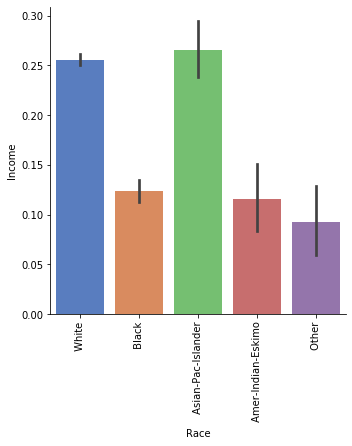

In [269]:
sns.factorplot(x='Race',y='Income',data=train,height=5,kind='bar',palette='muted')
plt.xticks(rotation=90)

## Sex

(array([0, 1]), <a list of 2 Text xticklabel objects>)

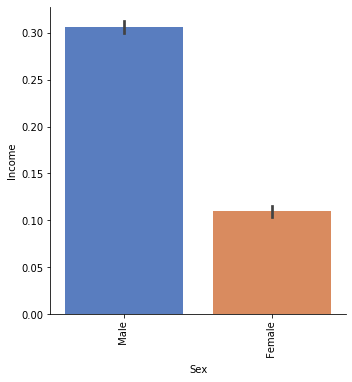

In [270]:
sns.factorplot(x='Sex',y='Income',data=train,height=5,kind='bar',palette='muted')
plt.xticks(rotation=90)


Capital Gain, Cappital Loss,Hours/Week needs only to be standardized


## Native country

In [271]:
train['Native_country'].fillna('0',inplace=True)
test['Native_country'].fillna('0',inplace=True)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

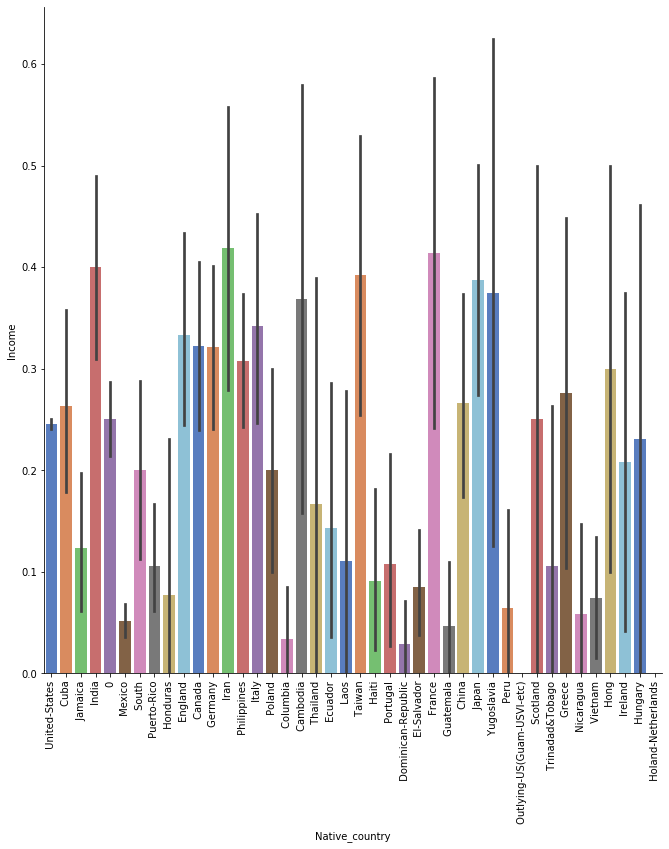

In [272]:
sns.factorplot(x='Native_country',y='Income',data=train,height=10,kind='bar',palette='muted')
plt.xticks(rotation=90)

We need to group the countries per zone

In [273]:
def native(country):
    if country in [' United-States', ' Cuba', '0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country    

In [274]:
train['Native_country'] = train['Native_country'].apply(native)
test['Native_country'] = test['Native_country'].apply(native)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

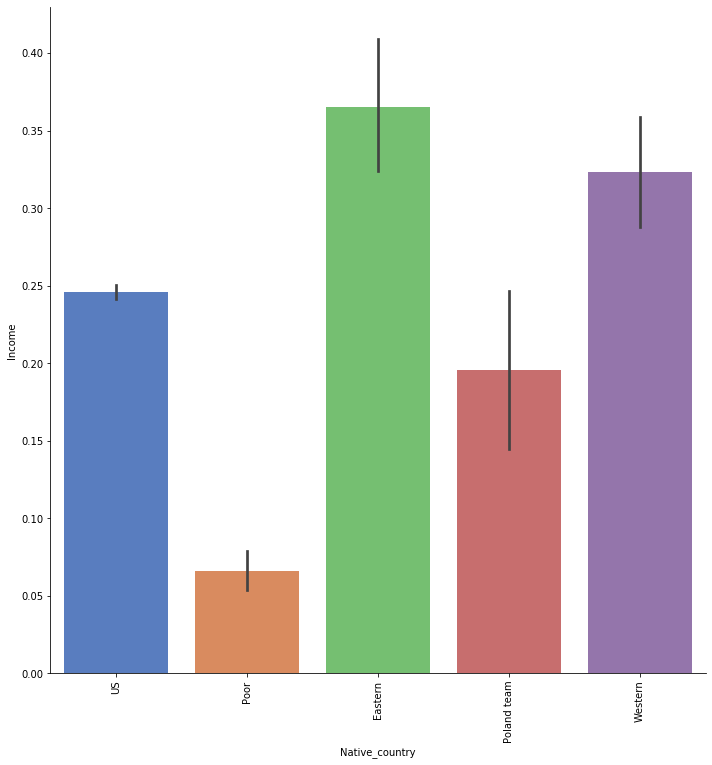

In [275]:
sns.factorplot(x='Native_country',y='Income',data=train,height=10,kind='bar',palette='muted')
plt.xticks(rotation=90)

## Categorical features

Now we will encode categorical features

In [276]:
data=pd.concat([train,test],axis=0)

In [277]:
data.dtypes

Age                 int64
Workclass          object
fnlgwt            float64
Education          object
Education_num       int64
Marital_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain        int64
Capital_Loss        int64
Hours/Week          int64
Native_country     object
Income              int64
dtype: object

In [278]:
categorical_features = data.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, data[col].nunique())

Workclass 8
Education 10
Marital_Status 6
Occupation 14
Relationship 6
Race 5
Sex 2
Native_country 5


In [279]:
for col in categorical_features:
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col, prefix_sep=':')], axis=1)
    data.drop(col, axis=1, inplace=True)

In [280]:
data.head()

,Age,fnlgwt,Education_num,Capital_Gain,Capital_Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male,Native_country:Eastern,Native_country:Poland team,Native_country:Poor,Native_country:US,Native_country:Western
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [281]:
train = data.head(train.shape[0])
test = data.tail(test.shape[0])

In [282]:
train.describe()

,Age,fnlgwt,Education_num,Capital_Gain,Capital_Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male,Native_country:Eastern,Native_country:Poland team,Native_country:Poor,Native_country:US,Native_country:Western
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,11.983778,10.080679,1077.648844,87.303830,40.437456,0.240810,0.029483,0.064279,0.000645,...,0.095943,0.008323,0.854274,0.330795,0.669205,0.011855,0.007217,0.043457,0.916679,0.020792
std,13.640433,0.630738,2.572720,7385.292085,402.960219,12.347429,0.427581,0.169159,0.245254,0.025388,...,0.294518,0.090851,0.352837,0.470506,0.470506,0.108234,0.084648,0.203886,0.276370,0.142689
min,17.000000,9.416216,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,11.676981,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,12.091542,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,12.376035,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,14.210727,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [288]:
Xtrain = train.drop('Income', axis=1)
Ttrain = train['Income']

Xtest = test.drop('Income', axis=1)
Ttest = test['Income']

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

## Logistic regression prediction

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(Xtrain, Ttrain)

Ytrain = model.predict(Xtrain)
Ytest = model.predict(Xtest)

C:\Users\FODIL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [291]:
print(classification_report(Ttrain, Ytrain))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     24720
           1       0.74      0.60      0.66      7841

    accuracy                           0.85     32561
   macro avg       0.81      0.77      0.79     32561
weighted avg       0.85      0.85      0.85     32561



In [292]:
print(classification_report(Ttest, Ytest))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     16281
           1       0.00      0.00      0.00         0

    accuracy                           0.81     16281
   macro avg       0.50      0.40      0.45     16281
weighted avg       1.00      0.81      0.89     16281



C:\Users\FODIL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [293]:
submission=pd.DataFrame()